In [2]:
import numpy as np
import tensorflow as tf

In [3]:
data_dir = r"C:\Users\Nitro 5\PycharmProjects\WInterProject\animal_data"
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1944 files belonging to 15 classes.
Using 1556 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1944 files belonging to 15 classes.
Using 388 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


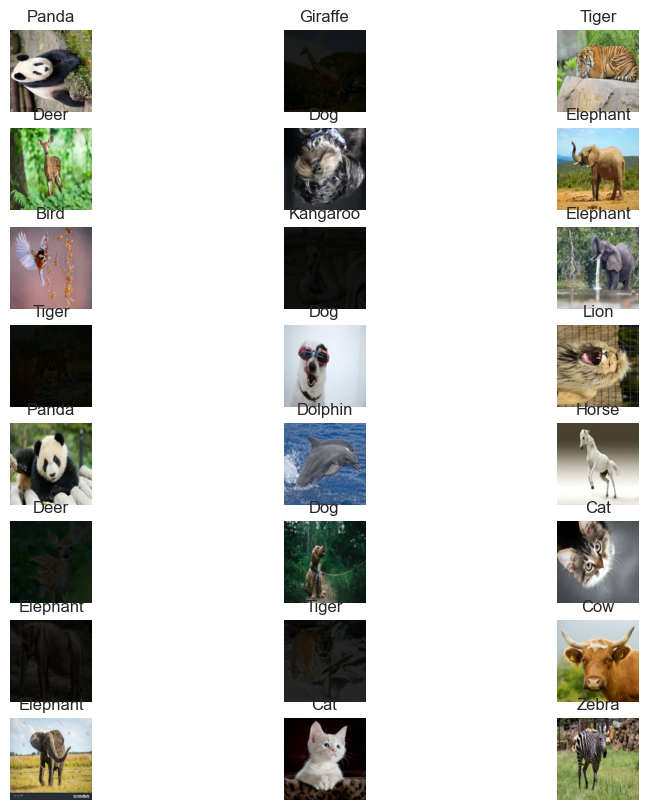

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(24):
    ax = plt.subplot(8, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [9]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
num_classes = 15

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [13]:
model.fit(
  train_ds,
  epochs=10
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.0720 - loss: 2.7616
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.2414 - loss: 2.3961
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.5076 - loss: 1.6798
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7023 - loss: 1.0244
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.8179 - loss: 0.7583
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.8985 - loss: 0.3991
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9500 - loss: 0.2085
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9787 - loss: 0.1285
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9887 - loss: 0.0750
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9853 - loss: 0.0743


In [14]:
test_loss, test_acc = model.evaluate(val_ds)

print('\nTest accuracy:', test_acc)
print('Test loss:', test_loss)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6618 - loss: 2.7200

Test accuracy: 0.6649484634399414
Test loss: 3.1492555141448975


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


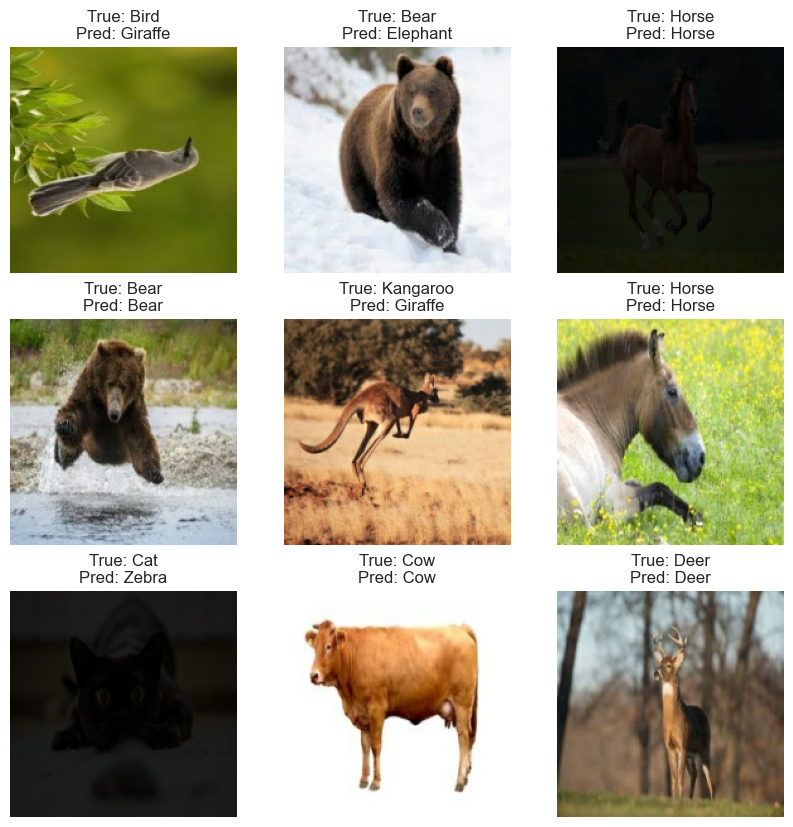

Validation Accuracy: 66.49%


In [19]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(val_ds)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = np.concatenate([y.numpy() for x, y in val_ds])


def display_predictions(val_ds, predictions, true_classes, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in val_ds.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            predicted_label = class_names[predicted_classes[i]]
            true_label = class_names[true_classes[i]]
            plt.title(f"True: {true_label}\nPred: {predicted_label}")
            plt.axis("off")
    plt.show()


display_predictions(val_ds, predictions, true_classes, class_names)

accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
